# State Farm 
From Kaggle: https://www.kaggle.com/c/state-farm-distracted-driver-detection/data
Let's try to recreate what we did for cats-dogs-redux for this challenge.

In [1]:
import glob
import os
import numpy as np
from shutil import copyfile
from vgg16 import Vgg16
from sklearn.metrics import f1_score
import utils
%matplotlib inline

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


## To do
1. Create Sample folder with test, train and valid subfolders
2. Move files to the Sample subfolders
3. Create the Valid folder
4. Move files from train to Valid
5. Instatiate, finetune vgg
6. Fit, saving weights per epoch
7. Analyze results on Valid (store predictions/filenames)
8. Cut for logloss
9. Create link for FileLink in the right directory

## Sample

In [2]:
!pwd

/home/ubuntu/courses/deeplearning1/nbs


In [2]:
path_to_data = "/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/"
%cd $path_to_data

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm


In [11]:
# create sample dir
%mkdir sample

mkdir: cannot create directory ‘sample’: File exists


In [3]:
# move into sample dir and create subdirs
path_to_sample = path_to_data + "sample"
%cd $path_to_sample
%mkdir train
%mkdir test
%mkdir valid

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample
mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘valid’: File exists


In [15]:
# create subdirs with classes
%mkdir train/c0
%mkdir train/c1
%mkdir train/c2
%mkdir train/c3
%mkdir train/c4
%mkdir train/c5
%mkdir train/c6
%mkdir train/c7
%mkdir train/c8
%mkdir train/c9

%mkdir valid/c0
%mkdir valid/c1
%mkdir valid/c2
%mkdir valid/c3
%mkdir valid/c4
%mkdir valid/c5
%mkdir valid/c6
%mkdir valid/c7
%mkdir valid/c8
%mkdir valid/c9

mkdir: cannot create directory ‘train/c0’: File exists


In [34]:
# take random images and transfer to sample
%cd $path_to_data/train/c0

# grab imgs from a category
c0_imgs = glob.glob("*.jpg")

# shuffle the order
c0_imgs_rand = np.random.permutation(c0_imgs)

# use copyfile from shutil to COPY 50 of them (we'll be using os.rename() to MOVE them to valid later)
for n in range(50):
    copyfile(c0_imgs_rand[n], path_to_sample + "/train/c0/" + c0_imgs_rand[n])

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c0


In [46]:
%cd $path_to_data


/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm


In [47]:
# I won't repeat this 10 times ...
%cd $path_to_data

def copy_to_sample(class_name):
    cur_path = path_to_data + "/train/" + class_name + "/"
    %cd $cur_path
    
    imgs = glob.glob("*.jpg")
    imgs_rand = np.random.permutation(imgs)
    for n in range(50):
        copyfile(imgs_rand[n], path_to_sample + "/train/" + class_name + "/" + imgs_rand[n])
        
remaining_classes = ["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]
for c in remaining_classes:
    copy_to_sample(c)

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c1
['img_44204.jpg', 'img_38958.jpg', 'img_59264.jpg', 'img_3428.jpg', 'img_95335.jpg', 'img_46439.jpg', 'img_83901.jpg', 'img_87912.jpg', 'img_7665.jpg', 'img_98489.jpg', 'img_101681.jpg', 'img_24258.jpg', 'img_27538.jpg', 'img_61777.jpg', 'img_50132.jpg', 'img_74124.jpg', 'img_95820.jpg', 'img_37603.jpg', 'img_16317.jpg', 'img_69886.jpg', 'img_40953.jpg', 'img_98983.jpg', 'img_66329.jpg', 'img_45632.jpg', 'img_13413.jpg', 'img_99479.jpg', 'img_32577.jpg', 'img_89472.jpg', 'img_94284.jpg', 'img_55951.jpg', 'img_15277.jpg', 'img_95497.jpg', 'img_79931.jpg', 'img_81717.jpg', 'img_56169.jpg', 'img_52165.jpg', 'img_69608.jpg', 'img_84824.jpg', 'img_30433.jpg', 'img_16197.jpg', 'img_52960.jpg', 'img_100358.jpg', 'img_38575.jpg', 'img_47896.jpg', 'img_74250.jpg', 'img_60236.jpg', 'img_96654.jpg', 'img_39941.jpg', 'img_75698.jpg', 'img_80545.jpg', 'img_102084.jpg'

In [49]:
%cd $path_to_sample

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample


In [58]:
# now move 5 from each sample/train/cX to sample/valid/cX
def move_to_valid(class_name):
    cur_path = path_to_sample + "/train/" + class_name + "/"
    %cd $cur_path
    
    # we don't need to randomize since they're already random
    imgs = glob.glob("*.jpg")
    for n in range (5):
        os.rename(imgs[n], path_to_sample + "/valid/" + class_name + "/" + imgs[n])

all_classes = ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]        
for c in all_classes:
    move_to_valid(c)
    

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c0
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c1
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c2
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c3
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c4
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c5
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c6
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c7
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c8
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/train/c9


In [69]:
# copy some data to sample/train for Schitz & Gigglez
%cd $path_to_data/test

test_imgs = glob.glob("*.jpg")
test_imgs_rand = np.random.permutation(test_imgs)
for n in range(50):
    copyfile(test_imgs_rand[n], path_to_sample + "/test/" + test_imgs_rand[n])

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/test


## Valid
Now move some from actual data's train to valid.
I created the valid and subdirs manually in tmux cause for fuck's sake.

In [70]:
!pwd

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/test


In [71]:
%cd $path_to_data

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm


In [72]:
# how many images per class do we have in train? (about 2500 so let's say 300 for valid)
%cd $path_to_data/train/c0
%ls | wc

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c0
   2489    2489   64500


In [74]:
%cd $path_to_data
# for all classes, move
def move_to_valid(class_name):
    cur_path = path_to_data + "/train/" + class_name + "/"
    %cd $cur_path
    
    imgs = glob.glob("*.jpg")
    imgs_rand = np.random.permutation(imgs)
    for n in range(300):
        os.rename(imgs_rand[n], path_to_data + "/valid/" + class_name + "/" + imgs_rand[n])
        
for c in all_classes:
    move_to_valid(c)

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c0
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c1
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c2
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c3
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c4
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c5
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c6
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c7
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c8
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/train/c9


## Instantiate, finetune and train on Sample

In [75]:
# do the whole thing on Sample, get F1 for sample/valid.
# STORE WEIGHTS AND FILENAMES IN SAMPLE/RESULTS

In [11]:
# instantiate the vgg
vgg = Vgg16()

In [54]:
# parameters
sample_batch_size = 64
sample_epochs = 6

In [55]:
st_batches = vgg.get_batches(path_to_sample + "/train/")
sv_batches = vgg.get_batches(path_to_sample + "/valid/")

Found 450 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [56]:
# finetune
vgg.finetune(st_batches)

In [57]:
# fit
vgg.fit(st_batches, sv_batches, nb_epoch=sample_epochs)

Epoch 1/6
450/450 [==============================] - 15s - loss: 4.2051 - acc: 0.1244 - val_loss: 2.6364 - val_acc: 0.1600
Epoch 2/6
450/450 [==============================] - 14s - loss: 3.0855 - acc: 0.2756 - val_loss: 1.8198 - val_acc: 0.4200
Epoch 3/6
450/450 [==============================] - 15s - loss: 2.6608 - acc: 0.3467 - val_loss: 1.6124 - val_acc: 0.4000
Epoch 4/6
450/450 [==============================] - 15s - loss: 2.1447 - acc: 0.4667 - val_loss: 2.0037 - val_acc: 0.5000
Epoch 5/6
450/450 [==============================] - 15s - loss: 1.9470 - acc: 0.4667 - val_loss: 1.7791 - val_acc: 0.4800
Epoch 6/6
450/450 [==============================] - 15s - loss: 1.6790 - acc: 0.5333 - val_loss: 1.9362 - val_acc: 0.4200


In [20]:
# create a results dir in sample to store model weights, filenames and preds
%cd $path_to_sample
%mkdir results

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample


In [58]:
# store model weights
vgg.model.save_weights(path_to_sample + "/results/s0.h5")

In [78]:
# let's add a learning rate
vgg.model.optimizer.lr = 0.01

In [79]:
# fit in a loop, storing weights as we go
for n in range(sample_epochs):
    vgg.fit(st_batches, sv_batches, nb_epoch=1)
    vgg.model.save_weights(path_to_sample + "/results/" + "s{}.h5".format(n + 1))

Epoch 1/1
450/450 [==============================] - 15s - loss: 0.8463 - acc: 0.7333 - val_loss: 1.4570 - val_acc: 0.5400
Epoch 1/1
450/450 [==============================] - 15s - loss: 1.1093 - acc: 0.6911 - val_loss: 2.2373 - val_acc: 0.4600
Epoch 1/1
450/450 [==============================] - 15s - loss: 1.0044 - acc: 0.7022 - val_loss: 1.8417 - val_acc: 0.5800
Epoch 1/1
450/450 [==============================] - 15s - loss: 0.9117 - acc: 0.7444 - val_loss: 1.6708 - val_acc: 0.6000
Epoch 1/1
450/450 [==============================] - 15s - loss: 0.8457 - acc: 0.7400 - val_loss: 1.5646 - val_acc: 0.4800
Epoch 1/1
450/450 [==============================] - 15s - loss: 1.0700 - acc: 0.7044 - val_loss: 1.9200 - val_acc: 0.5400


In [86]:
# make predictions on sample valid
sample_val_batches, sv_probs = vgg.test(path_to_sample + "/valid/", sample_batch_size)

Found 50 images belonging to 10 classes.


In [87]:
# grab and store actual filenames and predictions

# filenames
sv_filenames = sample_val_batches.filenames
print(sv_filenames[:5])
print(type(sv_filenames))

# predictions (should be a 10 dim array per picture)
print(type(sv_probs))
print(sv_probs[:5])

# actual classes
sv_actual_classes = sample_val_batches.classes
print(type(sv_actual_classes))
print(sv_actual_classes[::-5])

['c0/img_42034.jpg', 'c0/img_51330.jpg', 'c0/img_24234.jpg', 'c0/img_2236.jpg', 'c0/img_62484.jpg']
<type 'list'>
<type 'numpy.ndarray'>
[[  6.75682724e-01   1.23323247e-01   6.68495977e-06   1.10394566e-03
    8.48947167e-02   7.41008495e-04   1.79941882e-03   6.06435467e-04
    1.62188883e-03   1.10219836e-01]
 [  1.68591693e-01   5.49154915e-02   4.99456830e-04   7.25469112e-01
    4.04097118e-05   2.79759383e-03   9.45949520e-04   3.27692817e-07
    4.18278994e-03   4.25571650e-02]
 [  9.84646261e-01   1.58905805e-05   3.34416218e-05   3.87400542e-05
    4.36875744e-05   4.47227430e-05   1.71266822e-03   8.25940674e-07
    4.66812025e-06   1.34591199e-02]
 [  5.86329520e-01   3.14173900e-04   1.07726706e-02   2.59314857e-05
    2.69478100e-04   3.05266818e-04   3.13069075e-02   1.78405098e-05
    7.14075795e-05   3.70586783e-01]
 [  8.39333177e-01   4.02494479e-05   3.35323799e-04   1.02751845e-04
    6.05535344e-04   8.28354899e-03   1.48358911e-01   1.17942500e-06
    2.79986416e

In [88]:
# I would like to now get the classes that we predicted, in an array with 1 index = 1 image
sv_predicted_classes = []
for probs_per_image in sv_probs:
    biggest_prob = max(probs_per_image)
    index = np.where(probs_per_image==biggest_prob)[0][0]
    sv_predicted_classes.append(index)
    
print(sv_predicted_classes)

[0, 3, 0, 0, 0, 6, 5, 1, 1, 5, 2, 8, 2, 8, 2, 3, 0, 3, 3, 3, 3, 4, 0, 0, 3, 5, 5, 5, 5, 5, 5, 6, 6, 1, 6, 0, 7, 7, 7, 7, 6, 3, 9, 1, 8, 3, 0, 0, 9, 5]


In [89]:
print(sv_predicted_classes)
print(sv_actual_classes)

[0, 3, 0, 0, 0, 6, 5, 1, 1, 5, 2, 8, 2, 8, 2, 3, 0, 3, 3, 3, 3, 4, 0, 0, 3, 5, 5, 5, 5, 5, 5, 6, 6, 1, 6, 0, 7, 7, 7, 7, 6, 3, 9, 1, 8, 3, 0, 0, 9, 5]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


In [90]:
# F1 score
sample_f1 = f1_score(sv_actual_classes, sv_predicted_classes, average="weighted")
print(sample_f1)

0.537142857143


In [85]:
# let's load the model that did better and see
vgg.model.load_weights(path_to_sample + "/results/s4.h5")

[[4 0 0 1 2 0 0 1 0 2]
 [0 2 0 0 0 0 1 0 1 0]
 [0 0 3 0 0 0 0 0 0 0]
 [1 0 0 4 2 0 0 0 1 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 2 0 0 0 5 1 0 0 1]
 [0 1 0 0 0 0 3 0 1 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 2 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1]]


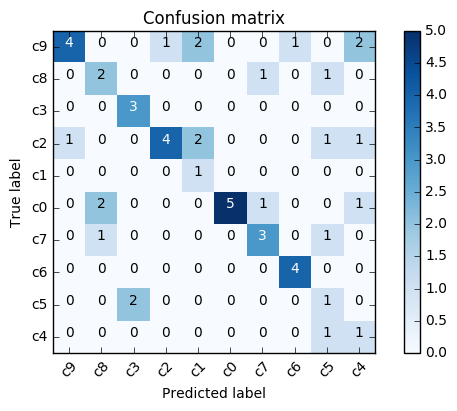

In [103]:
# let's see a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sv_predicted_classes, sv_actual_classes)
utils.plot_confusion_matrix(cm, sample_val_batches.class_indices)

### Investigate the images
Apparently c9 gets confused for c4 and c1. 

In [105]:
from keras.preprocessing import image

def plots_idx(indices, titles=None):
    utils.plots([image.load_img(path_to_sample + "/valid/" + sv_filenames[i]) for i in indices], titles=titles)

In [111]:
# how many to show at a time
n_view = 5

#### Correctly predicted

[ 0  2  3  4  7  8 10 12 14 15 17 18 19 21 25 26 27 28 29 31 32 34 36 37 38 39 44 48]
Found 28 correctly predicted out of 50


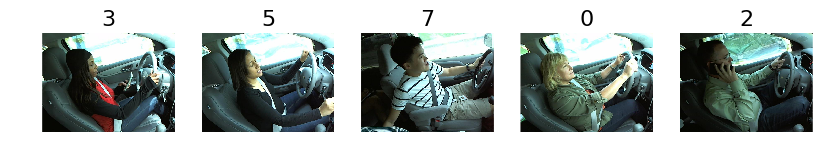

In [125]:
# in the sample we had 50 images in valid, these are the indices of the correctly predicted ones
s_correct = np.where(sv_actual_classes==sv_predicted_classes)[0]
print(s_correct)

print("Found {} correctly predicted out of 50".format(len(s_correct)))

# grab 5 random
sc_indices = np.random.permutation(s_correct)[:n_view]

# plot
plots_idx(sc_indices, sv_predicted_classes[sc_indices])

#### Incorrectly predicted

Found 22 incorrectly predicted out of 50


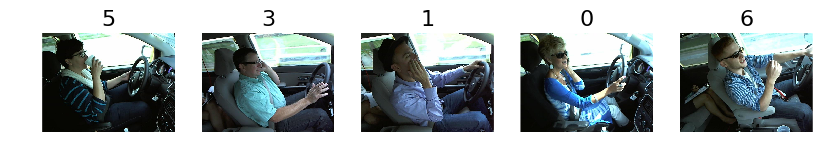

In [127]:
s_incorrect = np.where(sv_actual_classes!=sv_predicted_classes)[0]

print("Found {} incorrectly predicted out of 50".format(len(s_incorrect)))

# grab random 3
si_indices = np.random.permutation(s_incorrect)[:n_view]

# plot
plots_idx(si_indices, sv_predicted_classes[si_indices])

### Store the files needed to submit
In state-farm they want the name of the file and then the 10 probabilities for each class (log loss again).

In [129]:
# let's prepare a submission file
# img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1  

# obtain filenames without the dir
sv_ready_filenames = [fname[3:] for fname in sv_filenames]
print(sv_ready_filenames[:5])

['img_42034.jpg', 'img_51330.jpg', 'img_24234.jpg', 'img_2236.jpg', 'img_62484.jpg']


In [159]:
# obtain probabilities per image  (I've checked and they do sum up to 1)
print(sv_probs[1])
sv_ready_probs = []
for probs in sv_probs:
    ready_probs = [round(prob, 4) for prob in probs]
    
    # we could clip here because log loss
    
    sv_ready_probs.append(ready_probs)

[  1.6859e-01   5.4915e-02   4.9946e-04   7.2547e-01   4.0410e-05   2.7976e-03   9.4595e-04
   3.2769e-07   4.1828e-03   4.2557e-02]


In [160]:
# use np.stack to get the submission format right (COULDN't, np.stack requires same dimensions)
sv_submission = []
for i, name in enumerate(sv_ready_filenames):
    row_list = []
    row_list.append(name)
    row_list.extend(sv_ready_probs[i])
    sv_submission.append(row_list)

In [165]:
print(sv_submission[:5])

[['img_42034.jpg', 0.6757, 0.1233, 0.0, 0.0011, 0.0849, 0.0007, 0.0018, 0.0006, 0.0016, 0.1102], ['img_51330.jpg', 0.1686, 0.0549, 0.0005, 0.7255, 0.0, 0.0028, 0.0009, 0.0, 0.0042, 0.0426], ['img_24234.jpg', 0.9846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0017, 0.0, 0.0, 0.0135], ['img_2236.jpg', 0.5863, 0.0003, 0.0108, 0.0, 0.0003, 0.0003, 0.0313, 0.0, 0.0001, 0.3706], ['img_62484.jpg', 0.8393, 0.0, 0.0003, 0.0001, 0.0006, 0.0083, 0.1484, 0.0, 0.0028, 0.0001]]


In [170]:
# use np.savetxt to store the csv submission (COULDN'T figure out the fmt for string...)
sv_submission_filename = "sample_submission_1.csv"
import csv

columns = ["img", "c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]

with open("/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/sample/results/" + sv_submission_filename, "w") as f:
    csv_writer = csv.DictWriter(f, fieldnames=columns)
    csv_writer.writeheader()
    
    for row in sv_submission:
        new_row = dict()
        new_row["img"] = row[0]
        new_row["c0"] = row[1]
        new_row["c1"] = row[2]
        new_row["c2"] = row[3]
        new_row["c3"] = row[4]
        new_row["c4"] = row[5]
        new_row["c5"] = row[6]
        new_row["c6"] = row[7]
        new_row["c7"] = row[8]
        new_row["c8"] = row[9]
        new_row["c9"] = row[10]
        
        csv_writer.writerow(new_row)

        

#### Store the 3 files in results (submission, filenames and probs)
Go on.

In [172]:
# submission is already saved by the cell above

# filenames
np.save(path_to_sample + "/results/filenames_1", sv_ready_filenames)
np.save(path_to_sample + "/results/probs_1", sv_ready_probs)

## Repeat for Valid (and submit)

In [3]:
# instantiate the vgg
vgg = Vgg16()

In [4]:
# parameters
main_batch_size = 64
main_epochs = 6

In [7]:
mt_batches = vgg.get_batches(path_to_data + "/train/")
mv_batches = vgg.get_batches(path_to_data + "/valid/")

Found 19424 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [8]:
# finetune
vgg.finetune(mt_batches)

In [11]:
# let's add a learning rate
vgg.model.optimizer.lr = 0.001

In [5]:
# load best weights
vgg.model.load_weights(path_to_data + "/results/" + "m6.h5")

In [12]:
# fit in a loop, storing weights as we go
for n in range(main_epochs):
    vgg.fit(mt_batches, mv_batches, nb_epoch=1)
    vgg.model.save_weights(path_to_data + "/results/" + "m{}.h5".format(n + 1))

Epoch 1/1
19424/19424 [==============================] - 630s - loss: 6.6899 - acc: 0.5411 - val_loss: 4.9305 - val_acc: 0.6600
Epoch 1/1
19424/19424 [==============================] - 630s - loss: 6.5912 - acc: 0.5503 - val_loss: 5.4428 - val_acc: 0.6293
Epoch 1/1
19424/19424 [==============================] - 630s - loss: 6.6183 - acc: 0.5502 - val_loss: 4.6468 - val_acc: 0.6867
Epoch 1/1
19424/19424 [==============================] - 630s - loss: 6.6171 - acc: 0.5543 - val_loss: 4.6794 - val_acc: 0.6843
Epoch 1/1
19424/19424 [==============================] - 630s - loss: 6.6369 - acc: 0.5549 - val_loss: 4.9474 - val_acc: 0.6670
Epoch 1/1
19424/19424 [==============================] - 630s - loss: 6.6609 - acc: 0.5556 - val_loss: 4.7130 - val_acc: 0.6830


In [13]:
# make predictions on sample valid
main_val_batches, main_probs = vgg.test(path_to_data + "/valid/", main_batch_size)

Found 3000 images belonging to 10 classes.


In [ ]:
# grab and store actual filenames and predictions

# filenames
mv_filenames = main_val_batches.filenames
print(mv_filenames[:5])
print(type(mv_filenames))

# predictions (should be a 10 dim array per picture)
print(type(main_probs))
print(main_probs[:5])

# actual classes
mv_actual_classes = main_val_batches.classes
print(type(mv_actual_classes))
print(mv_actual_classes[::-5])

In [ ]:
# I would like to now get the classes that we predicted, in an array with 1 index = 1 image
mv_predicted_classes = []
for probs_per_image in main_probs:
    biggest_prob = max(probs_per_image)
    index = np.where(probs_per_image==biggest_prob)[0][0]
    mv_predicted_classes.append(index)
    
print(mv_predicted_classes)

In [ ]:
print(mv_predicted_classes)
print(mv_actual_classes)

In [ ]:
# F1 score
main_f1 = f1_score(mv_actual_classes, mv_predicted_classes, average="weighted")
print(main_f1)

In [ ]:
# let's see a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(mv_predicted_classes, mv_actual_classes)
utils.plot_confusion_matrix(cm, main_val_batches.class_indices)

### Main Submission
In state-farm they want the name of the file and then the 10 probabilities for each class (log loss again).

In [7]:
main_test_batches, main_test_probs = vgg.test(path_to_data + "/test/", main_batch_size)

Found 79726 images belonging to 1 classes.


In [8]:
# grab and store actual filenames and predictions

# filenames
mt_filenames = main_test_batches.filenames
print(mt_filenames[:5])
print(type(mt_filenames))

# predictions (should be a 10 dim array per picture)
print(type(main_test_probs))
print(main_test_probs[:5])

['unknown/img_81601.jpg', 'unknown/img_14887.jpg', 'unknown/img_62885.jpg', 'unknown/img_45125.jpg', 'unknown/img_22633.jpg']
<type 'list'>
<type 'numpy.ndarray'>
[[  1.0985e-29   9.3397e-42   1.6213e-42   0.0000e+00   0.0000e+00   9.0944e-16   5.2039e-16
    2.1629e-41   2.8140e-17   1.0000e+00]
 [  9.9017e-01   2.2797e-10   2.6686e-30   9.9492e-44   3.6673e-23   1.3443e-17   1.7840e-15
    1.3154e-29   9.8343e-03   5.6370e-37]
 [  0.0000e+00   0.0000e+00   0.0000e+00   2.8163e-38   1.0000e+00   1.0806e-38   1.6291e-29
    0.0000e+00   2.8220e-20   0.0000e+00]
 [  0.0000e+00   1.3312e-43   0.0000e+00   0.0000e+00   3.5385e-36   0.0000e+00   1.7429e-33
    0.0000e+00   1.0000e+00   8.1131e-41]
 [  1.0925e-34   1.0315e-11   2.0490e-41   0.0000e+00   1.3316e-22   1.3236e-23   5.6397e-15
    1.8773e-40   1.0000e+00   3.3219e-18]]


In [10]:
# I would like to now get the classes that we predicted, in an array with 1 index = 1 image
mt_predicted_classes = []
for probs_per_image in main_test_probs:
    biggest_prob = max(probs_per_image)
    index = np.where(probs_per_image==biggest_prob)[0][0]
    mt_predicted_classes.append(index)
    
print(mt_predicted_classes)

[9, 0, 4, 8, 8, 1, 0, 8, 0, 5, 1, 5, 4, 0, 9, 5, 1, 1, 6, 4, 9, 8, 0, 4, 6, 4, 8, 4, 8, 8, 8, 8, 0, 6, 4, 4, 9, 1, 4, 8, 8, 4, 1, 8, 0, 9, 4, 6, 9, 8, 0, 8, 1, 8, 3, 9, 3, 9, 1, 4, 5, 8, 5, 9, 6, 8, 6, 8, 8, 8, 5, 0, 8, 1, 0, 4, 8, 8, 6, 6, 4, 1, 1, 8, 5, 8, 0, 8, 1, 8, 5, 5, 8, 4, 4, 5, 6, 8, 0, 5, 4, 4, 6, 5, 4, 6, 3, 4, 9, 8, 0, 8, 1, 8, 8, 9, 1, 0, 9, 5, 8, 8, 8, 8, 5, 0, 5, 4, 4, 3, 6, 8, 8, 4, 5, 3, 4, 4, 4, 8, 8, 0, 3, 3, 4, 6, 0, 8, 6, 5, 0, 3, 0, 1, 8, 4, 8, 8, 8, 8, 4, 8, 8, 4, 8, 3, 8, 1, 8, 8, 5, 8, 8, 0, 4, 4, 6, 8, 8, 0, 5, 1, 8, 4, 5, 6, 5, 0, 9, 8, 6, 1, 0, 1, 4, 8, 5, 8, 1, 8, 6, 6, 1, 1, 5, 8, 4, 8, 8, 0, 4, 6, 8, 0, 8, 6, 1, 8, 1, 6, 4, 8, 6, 9, 0, 0, 4, 8, 4, 6, 3, 8, 0, 8, 8, 6, 5, 8, 4, 5, 4, 4, 0, 8, 8, 5, 9, 5, 8, 8, 4, 5, 4, 4, 6, 9, 0, 8, 4, 4, 5, 1, 4, 6, 4, 5, 6, 4, 8, 8, 8, 8, 1, 8, 4, 0, 1, 5, 1, 9, 5, 8, 5, 8, 1, 0, 0, 8, 5, 4, 8, 6, 8, 8, 4, 5, 8, 4, 1, 8, 8, 8, 0, 0, 0, 0, 4, 8, 6, 1, 8, 8, 5, 9, 8, 8, 0, 5, 6, 4, 4, 5, 8, 4, 4, 1, 6, 0, 4, 0, 5, 0, 3, 

In [17]:
# let's prepare a submission file
# img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1  

# obtain filenames without the dir
mt_ready_filenames = [fname[8:] for fname in mt_filenames]
print(mt_ready_filenames[:5])

['img_81601.jpg', 'img_14887.jpg', 'img_62885.jpg', 'img_45125.jpg', 'img_22633.jpg']


In [18]:
# obtain probabilities per image  (I've checked and they do sum up to 1)
print(main_test_probs[1])
mt_ready_probs = []
for probs in main_test_probs:
    ready_probs = [round(prob, 4) for prob in probs]
    mt_ready_probs.append(ready_probs)

[  9.9017e-01   2.2797e-10   2.6686e-30   9.9492e-44   3.6673e-23   1.3443e-17   1.7840e-15
   1.3154e-29   9.8343e-03   5.6370e-37]


In [22]:
# add clipping for log loss
clipped_probs = np.clip(mt_ready_probs, 0.05, 0.95)

In [19]:
# use np.stack to get the submission format right (COULDN't, np.stack requires same dimensions)
mt_submission = []
for i, name in enumerate(mt_ready_filenames):
    row_list = []
    row_list.append(name)
    row_list.extend(mt_ready_probs[i])
    mt_submission.append(row_list)

In [20]:
print(mt_submission[:5])

[['img_81601.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], ['img_14887.jpg', 0.9902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0098, 0.0], ['img_62885.jpg', 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['img_45125.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], ['img_22633.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]


In [21]:
# use np.savetxt to store the csv submission (COULDN'T figure out the fmt for string...)
mt_submission_filename = "main_submission_2.csv"
import csv

columns = ["img", "c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]

with open("/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm/results/" + mt_submission_filename, "w") as f:
    csv_writer = csv.DictWriter(f, fieldnames=columns)
    csv_writer.writeheader()
    
    for row in mt_submission:
        new_row = dict()
        new_row["img"] = row[0]
        new_row["c0"] = row[1]
        new_row["c1"] = row[2]
        new_row["c2"] = row[3]
        new_row["c3"] = row[4]
        new_row["c4"] = row[5]
        new_row["c5"] = row[6]
        new_row["c6"] = row[7]
        new_row["c7"] = row[8]
        new_row["c8"] = row[9]
        new_row["c9"] = row[10]
        
        csv_writer.writerow(new_row)

#### Consider log loss - might want to clip the highest probabilities
This would have to happen in the code around getting BUT see the score without that first